In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78864512/2d-scipy-optimize-curve-fit-using-a-1d-approach

In [8]:

###Define Lanbda function for Surface
sag_eq = lambda x, y, x0, y0, z0, r, k: ((1/r)*((x-x0)**2+(y-y0)**2)**2) / (1+np.sqrt(1-(1+k)*(1/r)**2*((x-x0)**2+(y-y0)**2))) + z0
sag_eq_wrapped = lambda index, x0, y0, z0, r, k: ((1/r)*((x_line[index]-x0)**2+(y_line[index]-y0)**2)**2) / (1+np.sqrt(1-(1+k)*(1/r)**2*((x_line[index]-x0)**2+(y_line[index]-y0)**2))) + z0

###Make Image and Domain
x_dom = np.linspace(0,0.32, 2**8)
y_dom = np.linspace(0,0.24, 2**7)
param = [x_dom[-1]/2, y_dom[-1]/2, 0, -0.2, -1]
zz = []
for y in y_dom:
    base = sag_eq(x_dom, y, param[0], param[1], param[2], param[3], param[4])
    noise = np.random.rand(len(base))
    zz.append(base+noise*1e-3)

###Make the two-dimnesional Data
zz = np.array(zz)
xx, yy = np.meshgrid(x_dom, y_dom)

###Make wrapped 1Dimnesional arrays
x_line = xx.reshape(len(x_dom)*len(y_dom))
y_line = yy.reshape(len(x_dom)*len(y_dom))
z_line = zz.reshape(len(x_dom)*len(y_dom))
index_line = np.arange(0, len(x_dom)*len(y_dom), dtype=int)

In [9]:
###Make surface using wrapped Lambda function
surface_1 = sag_eq_wrapped(index_line, param[0], param[1], param[2], param[3], param[4])
surface_1 = surface_1.reshape(len(y_dom), len(x_dom))

Text(0.5, 1.0, 'lamda made Surf')

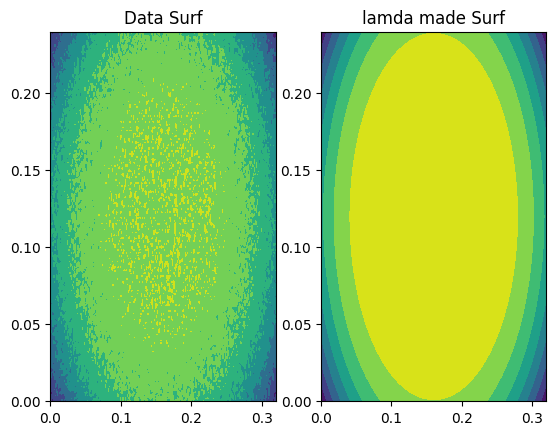

In [10]:
fig, [ax_data, ax_surf1] = plt.subplots(1,2)
ax_data.contourf(xx, yy, zz); ax_data.set_title("Data Surf")
ax_surf1.contourf(xx, yy, surface_1); ax_surf1.set_title("lamda made Surf")

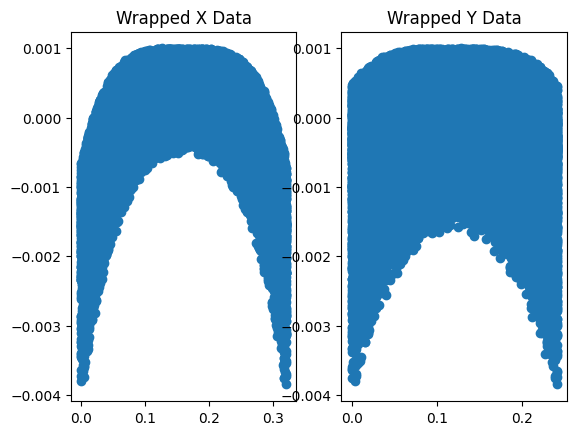

In [11]:
fig, [ax_x, ax_y] = plt.subplots(1, 2)
ax_x.scatter(x_line, z_line); ax_x.set_title("Wrapped X Data")
ax_y.scatter(y_line, z_line); ax_y.set_title("Wrapped Y Data")
plt.show()

In [13]:
popt, pcov = optimize.curve_fit(sag_eq_wrapped, index_line, z_line, p0 = param)

IndexError: arrays used as indices must be of integer (or boolean) type

In [18]:
def model(x, x0, y0, z0, r, k):
    return ((1 / r) * ((x[0] - x0) ** 2 + (x[1] - y0) **2) **2) / (1 + np.sqrt(1 - (1 + k) * (1/r) ** 2 * ((x[0] - x0) ** 2 + (x[1] - y0) ** 2))) + z0

In [43]:
param

[np.float64(0.16), np.float64(0.12), 0, -0.2, -1]

In [62]:
popt, pcov = optimize.curve_fit(model, [x_line, y_line], z_line, p0=[0.2, 0.2, 0., -0.1, -1])
popt, pcov

(array([ 1.59933408e-01,  1.20135077e-01,  4.99474227e-04, -1.98327589e-01,
        -1.05312362e+00]),
 array([[ 6.23363842e-09, -9.67064719e-14, -9.17427476e-14,
         -2.12181236e-10,  7.81917668e-09],
        [-9.67064719e-14,  1.40063897e-08,  2.09623759e-13,
          2.83771229e-10, -1.24165280e-08],
        [-9.17427476e-14,  2.09623759e-13,  7.59814526e-12,
          4.16322029e-09, -9.09518272e-08],
        [-2.12181236e-10,  2.83771229e-10,  4.16322029e-09,
          4.35907326e-06, -1.07458297e-04],
        [ 7.81917668e-09, -1.24165280e-08, -9.09518272e-08,
         -1.07458297e-04,  2.77570575e-03]]))

In [59]:
zhat = model([x_line, y_line], *popt)

In [60]:
Z = zhat.reshape(xx.shape)

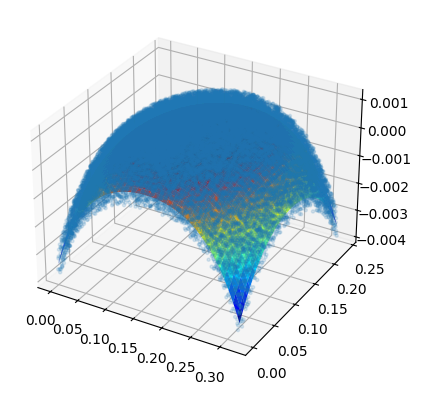

In [63]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.scatter(x_line, y_line, z_line, marker=".", alpha=0.15)
axe.plot_surface(xx, yy, zhat.reshape(xx.shape), cmap="jet")